<a href="https://colab.research.google.com/github/chenzubing/llm_mix/blob/main/Gorilla_hosted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gorilla Hosted - Try it out in less than 60s 🚀

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ShishirPatil/gorilla)  [![arXiv](https://img.shields.io/badge/arXiv-2305.15334-<COLOR>.svg?style=flat-square)](https://arxiv.org/abs/2305.15334)   [![Discord](https://img.shields.io/discord/1111172801899012102?label=Discord&logo=discord&logoColor=green&style=flat-square)](https://discord.gg/3apqwwME)  [![Twitter](https://img.shields.io/twitter/url?url=https://twitter.com/shishirpatil_/status/1661780076277678082)](https://twitter.com/shishirpatil_/status/1661780076277678082)

Play around with Gorilla! Here, we host the Gorilla zero-shot models, so you can try it out! This is compatible with the OpenAI chat completion API - plug and play!

🟢 Now with Apache-2.0! Gorilla is commercially usable with no obligations 🚀

We are happy to launch all three models: `gorilla-7b-hf-v0` which chooses from 925 Hugging Face APIs 0-shot, `gorilla-7b-th-v0` for 94 (exhaustive) Tensor Hub APIs 0-shot, `gorilla-7b-tf-v0` for 626 (exhaustive) Tensorflow Hub APIs 0-shot. `gorilla-mpt-7b-hf-v0` and `gorilla-falcon-7b-hf-v0`are two Apache-2.0 licensed models for Hugging Face APIs. We have a hosted end-point for `gorilla-mpt-7b-hf-v0` in this colab, and are in the process of adding `gorilla-falcon-7b-hf-v0` soon! In spirit of openess, we do not filter, nor carry out any post processing either to the prompt nor response. We will release the combined {HF+TF+TH} model which also has generic chat capability slowly to accomodate server demand.

💃 If you want to use Gorilla or build on top of it! Feel absolutely free to do so - we believe in open source research and you don't even have to tell us! In case you choose to do, we have a vibrant community in Discord! Stop by and say Hi 👋

<img src="https://github.com/ShishirPatil/gorilla/blob/gh-pages/assets/img/logo.png?raw=true" width=30% height=30%>

## Gorilla 🦍 is hosted by UC Berkeley Sky lab for FREE 🤩 as a research prototype 🤓
## Please don't use it for commercial serving 👀
## The hosted models are only trained to serve HuggingFace/TF/Torch APIs. They are NOT trained to serve other restful APIs. 

In [1]:
# Import Chat completion template and set-up variables
!pip install openai
import openai
import urllib.parse

openai.api_key = "EMPTY" # Key is ignored and does not matter
openai.api_base = "http://34.132.127.197:8000/v1"

# Report issues
def raise_issue(e, model, prompt):
    issue_title = urllib.parse.quote("[bug] Hosted Gorilla: <Issue>")
    issue_body = urllib.parse.quote(f"Exception: {e}\nFailed model: {model}, for prompt: {prompt}")
    issue_url = f"https://github.com/ShishirPatil/gorilla/issues/new?assignees=&labels=hosted-gorilla&projects=&template=hosted-gorilla-.md&title={issue_title}&body={issue_body}"
    print(f"An exception has occurred: {e} \nPlease raise an issue here: {issue_url}")

# Query Gorilla server 
def get_gorilla_response(prompt="I would like to translate from English to French.", model="gorilla-7b-hf-v0"):
  try:
    completion = openai.ChatCompletion.create(
      model=model,
      messages=[{"role": "user", "content": prompt}]
    )
    return completion.choices[0].message.content
  except Exception as e:
    raise_issue(e, model, prompt)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Example 1: Translation ✍ with 🤗

In [2]:
prompt = "I would like to translate from English to Chinese, please with detailed code."
print(get_gorilla_response(prompt, model="gorilla-7b-hf-v0" ))

<<<domain>>>: Natural Language Processing Text2Text Generation
<<<api_call>>>: MT5ForConditionalGeneration.from_pretrained('google/mt5-base')
<<<api_provider>>>: Hugging Face Transformers
<<<explanation>>>: 1. Import the required classes MT5ForConditionalGeneration and MT5Tokenizer from the transformers library.
2. Load the pre-trained model and tokenizer 'google/mt5-base'.
3. Set the source language of the tokenizer to English using the 'src_lang' parameter.
4. Encode the input text in English using the tokenizer.
5. Use the model to generate translations in Chinese by passing the encoded English input to the generate() method.
6. Decode the generated output tokens from the model using the tokenizer's 'decode' method, setting the 'return_tensors' parameter to 'pt' for PyTorch tensors. The result is the translated Chinese text.
7. Print the translated text.
<<<code>>>: from transformers import MT5ForConditionalGeneration, MT5Tokenizer
model = MT5ForConditionalGeneration.from_pretrained

In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
input_text = 'I am Bard, your creative and helpful collaborator. I have limitations and always get it right, but your feedback will help me improve. Not sure where to start?'

In [6]:
from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer
model = M2M100ForConditionalGeneration.from_pretrained('facebook/m2m100_1.2B')
tokenizer = M2M100Tokenizer.from_pretrained('facebook/m2m100_1.2B')
tokenizer.src_lang = 'en'  # replace with the appropriate language code
encoded_input = tokenizer(input_text, return_tensors='pt')  # replace input_text with your English text
output = model.generate(**encoded_input, forced_bos_token_id=tokenizer.get_lang_id('zh'))
translated_text = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
# for token in translated_text

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (200) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [7]:
translated_text

'我是Bard,你的创造性和有帮助的合作者. 我有局限性,总是得到正确的,但你的反馈将帮助我改进。'

## Example 2: Object detection 🔷 with 🤗

In [8]:
prompt = "I want to build a robot that can detecting objects in an image."
print(get_gorilla_response(prompt, model="gorilla-7b-hf-v0"))

<<<domain>>>: Computer Vision Object Detection
<<<api_call>>>: DetrForObjectDetection.from_pretrained('facebook/detr-resnet-50')
<<<api_provider>>>: Hugging Face Transformers
<<<explanation>>>: 1. Import the necessary libraries, which include DetrFeatureExtractor and DetrForObjectDetection from transformers, torch, PIL for image manipulation, and requests for fetching the image from the URL.
2. Load the pre-trained model 'facebook/detr-resnet-50' using the DetrForObjectDetection class. This model is designed for object detection using the DEtection TRansformer (DETR) architecture.
3. Create a feature extractor using the DetrFeatureExtractor class and the same model name.
4. Open the image from the URL and fetch the image using PIL.Image.open().
5. Preprocess the image using the feature extractor to create input tensors.
6. Pass the input tensors through the model to obtain the object detection outputs.
7. Post-process the outputs to obtain the final object detection results.
<<<code>>>

In [12]:
!wget "https://www.grxstatic.com/4f3rgqwzdznj/4IPtB6YNbhB6VKcH5c5wwS/4ddf7ad3cc59e8af7bf18fad0f2f0156/golden_retriever_gray_cat-1027475322.jpg?format=pjpg&auto=webp&width=704"

--2023-06-08 15:17:57--  https://www.grxstatic.com/4f3rgqwzdznj/4IPtB6YNbhB6VKcH5c5wwS/4ddf7ad3cc59e8af7bf18fad0f2f0156/golden_retriever_gray_cat-1027475322.jpg?format=pjpg&auto=webp&width=704
Resolving www.grxstatic.com (www.grxstatic.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to www.grxstatic.com (www.grxstatic.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27608 (27K) [image/jpeg]
Saving to: ‘golden_retriever_gray_cat-1027475322.jpg?format=pjpg&auto=webp&width=704’

golden_retriever_gr 100%[===================>]  26.96K  --.-KB/s    in 0s      

2023-06-08 15:17:57 (86.4 MB/s) - ‘golden_retriever_gray_cat-1027475322.jpg?format=pjpg&auto=webp&width=704’ saved [27608/27608]



In [1]:
pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
url = 'https://www.grxstatic.com/4f3rgqwzdznj/4IPtB6YNbhB6VKcH5c5wwS/4ddf7ad3cc59e8af7bf18fad0f2f0156/golden_retriever_gray_cat-1027475322.jpg?format=pjpg&auto=webp&width=704'

In [5]:
from transformers import DetrFeatureExtractor, DetrForObjectDetection
import torch
import requests
from PIL import Image
# url = 'https://example.com/image.jpg'  # Replace with your image URL
image = Image.open(requests.get(url, stream=True).raw)
model = DetrForObjectDetection.from_pretrained('facebook/detr-resnet-50')
feature_extractor = DetrFeatureExtractor.from_pretrained('facebook/detr-resnet-50')
inputs = feature_extractor(images=image, return_tensors='pt')
outputs = model(**inputs)

/usr/local/lib/python3.10/dist-packages/transformers/models/detr/feature_extraction_detr.py:28: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [14]:
from matplotlib import pyplot as plt

NameError: ignored

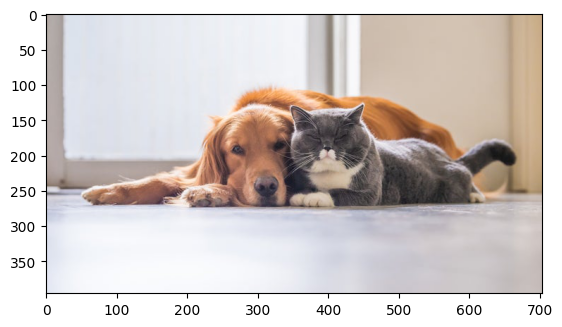

In [17]:
from transformers import DetrFeatureExtractor, DetrForObjectDetection
import torch
import requests
from PIL import Image

# Set the URL of the image you want to detect objects in.
# url = 'https://example.com/image.jpg'

# Download the image and open it in PIL.
image = Image.open(requests.get(url, stream=True).raw)

# Create a DetrForObjectDetection model and a DetrFeatureExtractor.
model = DetrForObjectDetection.from_pretrained('facebook/detr-resnet-50')
feature_extractor = DetrFeatureExtractor.from_pretrained('facebook/detr-resnet-50')

# Convert the image to a PyTorch tensor.
inputs = feature_extractor(images=image, return_tensors='pt')

# Get the object detection results from the model.
outputs = model(**inputs)

# Process the outputs
probas = outputs.logits.softmax(-1)
keep = probas.max(-1).values > 0.85  # You can adjust the threshold

probas_to_keep = probas[keep]
boxes_to_keep = outputs.pred_boxes[keep]

# Display the image
fig, ax = plt.subplots(1)
ax.imshow(image)

# Draw bounding boxes and labels
for prob, box in zip(probas_to_keep, boxes_to_keep):
    label = prob.argmax()
    score = prob[label]
    # label_name = COCO_CLASSES[label]

    # Create a Rectangle patch
    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    # plt.text(box[0], box[1], f'{label_name} {score:.2f}', bbox=dict(facecolor='yellow', alpha=0.5))

plt.show()

## Let's try to invoke APIs from Torch Hub and TensorFlow Hub instead for the same prompts!

In [ ]:
# Translation ✍ with Torch Hub
prompt = "I would like to translate from English to Chinese."
print(get_gorilla_response(prompt, model="gorilla-7b-th-v0"))

{'domain': 'Machine Translation', 'api_call': \"model = torch.hub.load('pytorch/fairseq', 'transformer.wmt14.en-fr', tokenizer='moses', bpe='subword_nmt')\", 'api_provider': 'PyTorch', 'explanation': 'Load the Transformer model from PyTorch Hub, which is specifically trained on the WMT 2014 English-French translation task.', 'code': 'import torch\nmodel = torch.hub.load('pytorch/fairseq', 'transformer.wmt14.en-fr', tokenizer='moses', bpe='subword_nmt')'}"



In [ ]:
# Object Detection 🔷 with Tensor Flow
prompt = "I want to build a robot that can detecting objects in an image."
print(get_gorilla_response(prompt, model="gorilla-7b-tf-v0"))

<<<domain>>>: Image object detection, <<<api_call>>>: hub.load('https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2'), <<<api_provider>>>: TensorFlow Hub, <<<explanation>>>: This API call loads the pre-trained SSD MobileNet V2 model from TensorFlow Hub, which is designed for object detection in images. Once loaded, you can pass an image to the detector to get back the detected objects along with their bounding boxes, class labels, and associated confidence scores. This model can be used to build a robot that can detect objects in images. <<<code>>>: import tensorflow as tf\nimport tensorflow_hub as hub\n# Load the SSD MobileNet V2 model\ndetector = hub.load('https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2')\n# Prepare the image\nimage = tf.keras.preprocessing.image.load_img('path/to/image.jpg')\nimage = tf.keras.preprocessing.image.img_to_array(image)\n# Detect objects in the image\nresult = detector(image[np.newaxis, ...])\n"


## ⛳️ With Gorilla being fine-tuned on MPT, and Falcon, you can use Gorilla commercially with no obligations! 🟢 

In [ ]:
# Gorilla with `gorilla-mpt-7b-hf-v0`
prompt = "I would like to translate from English to Chinese."
print(get_gorilla_response(prompt, model="gorilla-mpt-7b-hf-v0"))

Please provide the English text you would like to translate: \"Translate this text to Chinese:\"\n<<<domain>>>: Natural Language Processing Text2Text Generation\n<<<api_call>>>: M2M100ForConditionalGeneration.from_pretrained('facebook/m2m100_1.2B')\n<<<api_provider>>>: Hugging Face Transformers\n<<<explanation>>>: 1. Import the necessary libraries - M2M100ForConditionalGeneration and M2M100Tokenizer from the transformers library.\n2. Load the pretrained model 'facebook/m2m100_1.2B' and its corresponding tokenizer.\n3. Set the source language to English (en) and use the tokenizer to tokenize the input text.\n4. Use the model to generate the translated text in Chinese by providing the tokenized input to the 'generate' function.\n5. Decode the generated tokens back into a readable text string using the tokenizer.\n<<<code>>>: from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer\nsrc_text = \"Translate this text to Chinese:\"\nsrc_lang = \"en\"\nmodel = M2M100ForConditi

# 🚀 Using gorilla is as easy as calling `get_gorilla_response()` with your prompt! Try out Gorilla, and share your interesting findings in `#showcase` 🤩 [Discord](https://discord.gg/3apqwwME)!